<a href="https://colab.research.google.com/github/kanishkmunot/Animal_classifiaction_SRIP/blob/main/Animal_CV_one_v_rest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SRIP Submission: Animal Classification using One v/s Rest approach - By Kanishk Munot

> Note: I have done One v/s rest approach in this notebook. 5 class classification is in the other notebook, which is present in the github repository

## Step - 1
> I have downloaded the dataset from kaggle from the link given in the assignment, unzipped the zip file and then splitted it into train, test and validation sets

In [1]:
! pip install kaggle

In [2]:
pip install split-folders

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download iamsouravbanerjee/animal-image-dataset-90-different-animals

100% 656M/656M [00:06<00:00, 164MB/s]
100% 656M/656M [00:06<00:00, 103MB/s]


In [7]:
! unzip animal-image-dataset-90-different-animals

Streaming output truncated to the last 5000 lines.
  inflating: animals/animals/bison/73b10839bc.jpg  
  inflating: animals/animals/bison/74dc1dd32a.jpg  
  inflating: animals/animals/bison/75ab166a7d.jpg  
  inflating: animals/animals/bison/79e1610d01.jpg  
  inflating: animals/animals/bison/7ba5eee91f.jpg  
  inflating: animals/animals/bison/7d214aab4b.jpg  
  inflating: animals/animals/bison/7f2ef9ab03.jpg  
  inflating: animals/animals/bison/82ec723a4f.jpg  
  inflating: animals/animals/bison/85e145af6c.jpg  
  inflating: animals/animals/bison/862e2c6379.jpg  
  inflating: animals/animals/bison/87a5c700ad.jpg  
  inflating: animals/animals/bison/88b723ce90.jpg  
  inflating: animals/animals/bison/8c3af742c3.jpg  
  inflating: animals/animals/bison/8e34044b98.jpg  
  inflating: animals/animals/bison/8e6adbdc40.jpg  
  inflating: animals/animals/bison/8fce80d5ba.jpg  
  inflating: animals/animals/bison/961a895686.jpg  
  inflating: animals/animals/bison/984a5b583d.jpg  
  inflating: 

## Step - 2
> Loading & pre-processing images

In [9]:
import tensorflow as tf


image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range= 20,
    width_shift_range =0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=lambda x: x / 255.0
)


dataset_from_directory = image_generator.flow_from_directory(
    directory='/content/animals/animals',
    target_size=(256, 256),
    batch_size=32,
    shuffle=False
)


for images, labels in dataset_from_directory:

    image_height, image_width, num_channels = images[0].shape
    batch_size = len(images)
    print("Image dimensions:", (image_height, image_width, num_channels))
    print("Batch size:", batch_size)
    break

Found 5400 images belonging to 90 classes.
Image dimensions: (256, 256, 3)
Batch size: 32


In [10]:
images.shape

(32, 256, 256, 3)

In [11]:
!ls /content/animals/animals

antelope     cockroach	elephant     hippopotamus  lobster    parrot	      seahorse	turtle
badger	     cow	flamingo     hornbill	   mosquito   pelecaniformes  seal	whale
bat	     coyote	fly	     horse	   moth       penguin	      shark	wolf
bear	     crab	fox	     hummingbird   mouse      pig	      sheep	wombat
bee	     crow	goat	     hyena	   octopus    pigeon	      snake	woodpecker
beetle	     deer	goldfish     jellyfish	   okapi      porcupine       sparrow	zebra
bison	     dog	goose	     kangaroo	   orangutan  possum	      squid
boar	     dolphin	gorilla      koala	   otter      raccoon	      squirrel
butterfly    donkey	grasshopper  ladybugs	   owl	      rat	      starfish
cat	     dragonfly	hamster      leopard	   ox	      reindeer	      swan
caterpillar  duck	hare	     lion	   oyster     rhinoceros      tiger
chimpanzee   eagle	hedgehog     lizard	   panda      sandpiper       turkey


In [12]:
import splitfolders
import os
path = '/content/animals/animals'
print(os.listdir(path))
splitfolders.ratio(path,seed=1337, output="Chess-Splitted", ratio=(0.6, 0.2, 0.2))

['kangaroo', 'donkey', 'pelecaniformes', 'swan', 'hippopotamus', 'owl', 'shark', 'turtle', 'squirrel', 'koala', 'horse', 'crow', 'seahorse', 'bat', 'sandpiper', 'sheep', 'octopus', 'fly', 'snake', 'bear', 'cat', 'crab', 'parrot', 'orangutan', 'duck', 'rat', 'leopard', 'ox', 'otter', 'tiger', 'rhinoceros', 'lion', 'woodpecker', 'goldfish', 'okapi', 'porcupine', 'lizard', 'whale', 'wombat', 'dog', 'zebra', 'goose', 'grasshopper', 'dragonfly', 'caterpillar', 'goat', 'antelope', 'deer', 'gorilla', 'possum', 'lobster', 'flamingo', 'oyster', 'chimpanzee', 'bison', 'eagle', 'moth', 'butterfly', 'hyena', 'hamster', 'cow', 'starfish', 'pig', 'dolphin', 'elephant', 'raccoon', 'badger', 'beetle', 'ladybugs', 'hornbill', 'penguin', 'mosquito', 'pigeon', 'reindeer', 'wolf', 'hummingbird', 'jellyfish', 'hedgehog', 'panda', 'mouse', 'bee', 'seal', 'squid', 'sparrow', 'turkey', 'fox', 'boar', 'hare', 'coyote', 'cockroach']


Copying files: 5400 files [00:02, 2414.08 files/s]


## Step - 3
> Checking how many images are in each folder

In [13]:
import os

output_directory = '/content/Chess-Splitted'

train_dir = os.path.join(output_directory, 'train')
test_dir = os.path.join(output_directory, 'test')
val_dir = os.path.join(output_directory, 'val')

def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images
    return class_counts


train_class_counts = count_images_per_class(train_dir)
test_class_counts = count_images_per_class(test_dir)
val_class_counts = count_images_per_class(val_dir)


print("Number of images for each class in train directory:\n")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count}")

print("\nNumber of images for each class in test directory:\n")
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count}")

print("\nNumber of images for each class in validation directory:\n")
for class_name, count in val_class_counts.items():
    print(f"{class_name}: {count}")


Number of images for each class in train directory:

kangaroo: 36
donkey: 36
pelecaniformes: 36
swan: 36
hippopotamus: 36
owl: 36
shark: 36
turtle: 36
squirrel: 36
koala: 36
horse: 36
crow: 36
seahorse: 36
bat: 36
sandpiper: 36
sheep: 36
octopus: 36
fly: 36
snake: 36
bear: 36
cat: 36
crab: 36
parrot: 36
orangutan: 36
duck: 36
rat: 36
leopard: 36
ox: 36
otter: 36
tiger: 36
rhinoceros: 36
lion: 36
woodpecker: 36
goldfish: 36
okapi: 36
porcupine: 36
lizard: 36
whale: 36
wombat: 36
dog: 36
zebra: 36
goose: 36
grasshopper: 36
dragonfly: 36
caterpillar: 36
goat: 36
antelope: 36
deer: 36
gorilla: 36
possum: 36
lobster: 36
flamingo: 36
oyster: 36
chimpanzee: 36
bison: 36
eagle: 36
moth: 36
butterfly: 36
hyena: 36
hamster: 36
cow: 36
starfish: 36
pig: 36
dolphin: 36
elephant: 36
raccoon: 36
badger: 36
beetle: 36
ladybugs: 36
hornbill: 36
penguin: 36
mosquito: 36
pigeon: 36
reindeer: 36
wolf: 36
hummingbird: 36
jellyfish: 36
hedgehog: 36
panda: 36
mouse: 36
bee: 36
seal: 36
squid: 36
sparrow: 36

## Step - 3
* **Rescaling** the images by diving them by 255
* Built a **multi-label classification** model with 90 neurons in the output layer for 90 different animal classes
* I tried tuning different parameters - learning rate, changing the number of neurons in the hidden layer, but not able to find out the reson for overfitting.


In [18]:
import os
import tensorflow as tf
from sklearn.metrics import classification_report


train_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

val_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)



train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
)

val_generator = val_data_generator.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
)


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(90, activation='softmax')  # We have 90 classes, that's why i added 90 neurons in the output
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical crossentropy for multiclass classification
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=val_generator)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Perform predictions on the test set
predictions = model.predict(test_generator)


Found 3240 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.
Epoch 1/15
102/102 [==============================] - 34s 319ms/step - loss: 4.4589 - accuracy: 0.0164 - val_loss: 4.3643 - val_accuracy: 0.0398
Epoch 2/15
102/102 [==============================] - 29s 290ms/step - loss: 4.2323 - accuracy: 0.0522 - val_loss: 4.2010 - val_accuracy: 0.0676
Epoch 3/15
102/102 [==============================] - 24s 234ms/step - loss: 3.8414 - accuracy: 0.1247 - val_loss: 4.0356 - val_accuracy: 0.1120
Epoch 4/15
102/102 [==============================] - 24s 235ms/step - loss: 3.1937 - accuracy: 0.2460 - val_loss: 3.9920 - val_accuracy: 0.1315
Epoch 5/15
102/102 [==============================] - 32s 316ms/step - loss: 2.3625 - accuracy: 0.4287 - val_loss: 4.0455 - val_accuracy: 0.1954
Epoch 6/15
102/102 [==============================] - 33s 328ms/step - loss: 1.4692 - accuracy: 0.6219 - val_loss: 4.7312 - val_accuracy: 0.2343
E

Found 1080 images belonging to 90 classes.
1/1 [==============================] - 0s 357ms/step


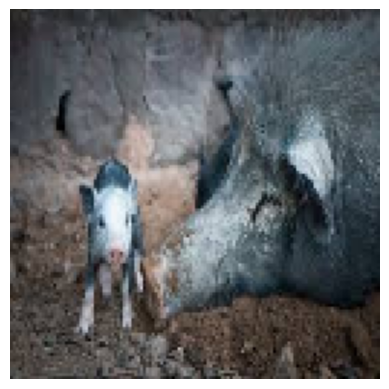

Predicted Class: boar
Probability: 0.99867743
Actual Class: boar


In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

# Define the path to the test directory
test_dir = '/content/Chess-Splitted/test'

# Define ImageDataGenerator for test data
test_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

# Load images from the test directory
test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multiclass classification
    shuffle=True  # Shuffle the data to randomly select a sample
)

# Get a random batch of images and labels from the test set
images, labels = test_generator.next()

# Select a random index from the batch
random_index = random.randint(0, images.shape[0] - 1)

# Get the random image and its corresponding label
random_image = images[random_index]
random_label = labels[random_index]

# Perform prediction on the random image
prediction = model.predict(np.expand_dims(random_image, axis=0))

# Get the predicted class and its probability
predicted_class_index = np.argmax(prediction)
predicted_probability = np.max(prediction)

# Get the actual class
actual_class_index = np.argmax(random_label)

# Get the class indices mapping from the generator
class_indices = test_generator.class_indices

# Invert the mapping to get class names from indices
class_names = {v: k for k, v in class_indices.items()}

# Get the class name for the predicted and actual classes
predicted_class_name = class_names[predicted_class_index]
actual_class_name = class_names[actual_class_index]

# Print the random image
plt.imshow(random_image)
plt.axis('off')
plt.show()

# Print the predicted class, its probability, and the actual class
print("Predicted Class:", predicted_class_name)
print("Probability:", predicted_probability)
print("Actual Class:", actual_class_name)


In [20]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 64)       

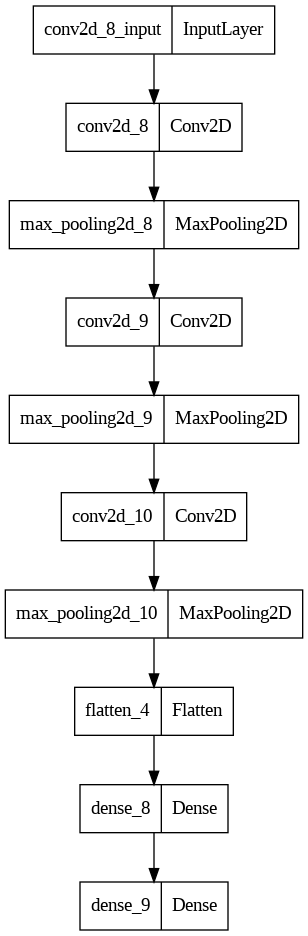

In [21]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)

## Model 2

* Tried adding a droupout layer in this model

In [22]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),  # Added a dropout layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(90, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator)

loss, accuracy = model2.evaluate(test_generator)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

predictions = model2.predict(test_generator)

Epoch 1/10
102/102 [==============================] - 26s 232ms/step - loss: 4.4446 - accuracy: 0.0185 - val_loss: 4.2988 - val_accuracy: 0.0389
Epoch 2/10
102/102 [==============================] - 26s 252ms/step - loss: 4.2141 - accuracy: 0.0500 - val_loss: 4.0891 - val_accuracy: 0.0806
Epoch 3/10
102/102 [==============================] - 32s 312ms/step - loss: 3.7654 - accuracy: 0.1253 - val_loss: 3.8685 - val_accuracy: 0.1250
Epoch 4/10
102/102 [==============================] - 29s 281ms/step - loss: 3.0951 - accuracy: 0.2543 - val_loss: 3.7874 - val_accuracy: 0.1528
Epoch 5/10
102/102 [==============================] - 24s 228ms/step - loss: 2.2968 - accuracy: 0.4302 - val_loss: 3.9718 - val_accuracy: 0.2139
Epoch 6/10
102/102 [==============================] - 23s 221ms/step - loss: 1.5235 - accuracy: 0.6009 - val_loss: 4.3135 - val_accuracy: 0.2231
Epoch 7/10
102/102 [==============================] - 24s 230ms/step - loss: 1.0179 - accuracy: 0.7250 - val_loss: 4.5602 - val_ac

Found 1080 images belonging to 90 classes.
1/1 [==============================] - 0s 72ms/step


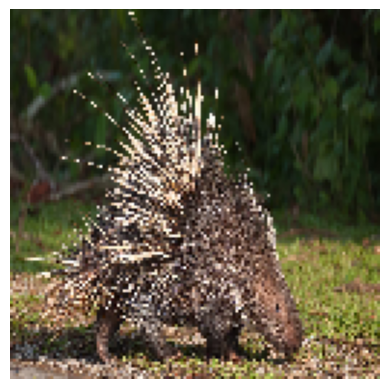

Predicted Class: leopard
Probability: 0.9434227
Actual Class: porcupine


In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

test_dir = '/content/Chess-Splitted/test'

test_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
)

images, labels = test_generator.next()

# Select a random index from the batch
random_index = random.randint(0, images.shape[0] - 1)

# Get the random image and its corresponding label
random_image = images[random_index]
random_label = labels[random_index]

# Perform prediction on the random image
prediction = model2.predict(np.expand_dims(random_image, axis=0))

# Get the predicted class and its probability
predicted_class_index = np.argmax(prediction)
predicted_probability = np.max(prediction)

actual_class_index = np.argmax(random_label)

class_indices = test_generator.class_indices

class_names = {v: k for k, v in class_indices.items()}

predicted_class_name = class_names[predicted_class_index]
actual_class_name = class_names[actual_class_index]


plt.imshow(random_image)
plt.axis('off')
plt.show()

print("Predicted Class:", predicted_class_name)
print("Probability:", predicted_probability)
print("Actual Class:", actual_class_name)


In [24]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 64)       

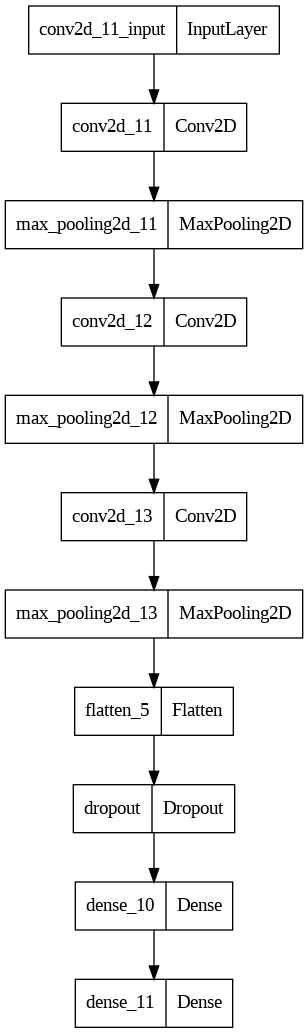

In [25]:
tf.keras.utils.plot_model(
    model2,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)